In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Loading dataset: We'll be using train dataset only for visualization
data=pd.read_csv('mnist_train.csv')
data.columns
# we can see that we have an index column and rest are pixel values of images
data['label'].describe()
# for first column, we have total 60k values ranging from 0-9
#Seperating class label
label=data['label']
data=data.drop('label',axis=1)

In [3]:
data.head() # we have seperated label from data and kept it in variable label.

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Visualizing a digit
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
fig=200
#Printing 200th value.
#data.iloc fetches 100th value from data
#np.array: convert this data to numpy array
#reshaping data to 28*28 matrix
grid_data=data.iloc[fig] 
grid_arr=np.array(grid_data)
grid_shaped=grid_arr.reshape(28,28)

<Figure size 504x504 with 0 Axes>

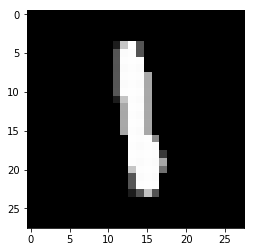

1


In [6]:
# Plotting the values.
plt.imshow(grid_shaped,interpolation="none",cmap="gray")
plt.show()
print(label[fig])
# We can see that image is 1 and we have label value as 1.

In [5]:
# Principal Component Analysis (PCA) using scikit learn

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# Standardizing data
std_data=StandardScaler().fit_transform(data)

In [39]:
#Implementing PCA 
pca=decomposition.PCA()
#Taking 2 parameters
pca.n_components=2
pca_data=pca.fit_transform(std_data)
pca_data=np.vstack((pca_data.T,label)).T
#appending label to pca_data

In [41]:
# Creating new data frame for above
df=pd.DataFrame(data=pca_data,columns=("1_column","2_column","label"))
df.head()
#784 dimesions reduced to 2 dimensions based on 1st and 2nd column values

,1_column,2_column,label
0,-0.922255,-4.814827,5.0
1,8.709014,-7.754538,0.0
2,2.328430,9.431790,4.0
3,-6.582144,-3.746351,1.0
4,-5.183236,3.133075,9.0


In [10]:
#Plotting above DF

sns.FacetGrid(df,hue='label',size=7).map(plt.scatter,'1_column','2_column').add_legend()
plt.show()
#Here we can see that there is too much overlapping between numbers
#Only 7 and 0 can be distingished little
# Therefore we will look for different approach

NameError: name 'df' is not defined

In [6]:
#Setting data for T-SNE(t-distribution stochastic neighbourhood embedding)
from sklearn.manifold import TSNE

tsne_data=std_data 
tsne_label=label



In [50]:
model=TSNE(n_components=2,random_state=0)
#We'll consider default perplexity=30 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# converting tsne resulted data to a DF for plotting.
# Column 1 and Column 2 are the 2 reduced dimensions achieved after running TSNE

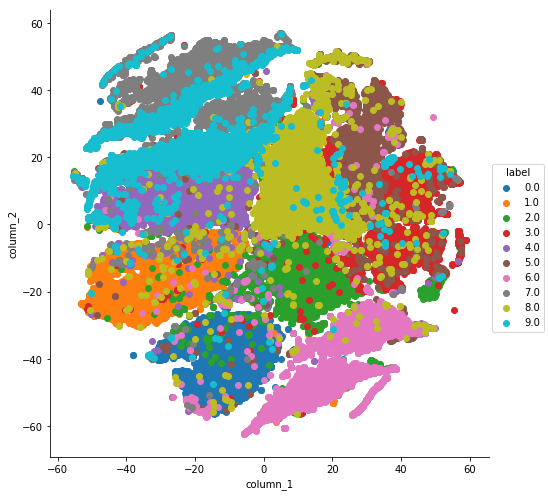

In [51]:
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

In [52]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=50)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T


TypeError: __init__() got an unexpected keyword argument 'colums'

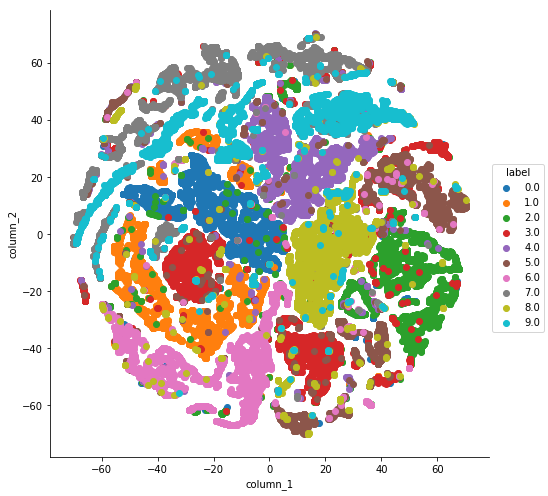

In [53]:
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

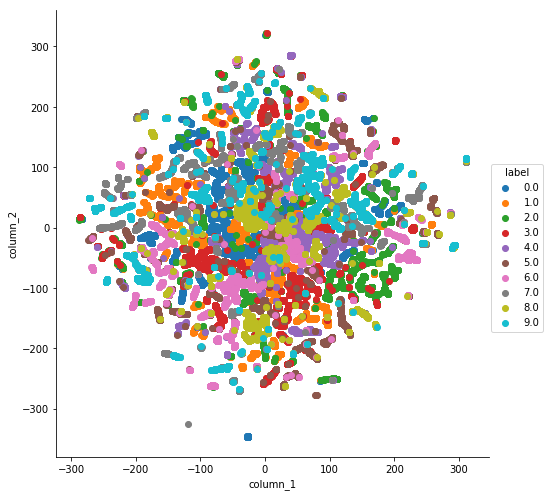

In [54]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=30, n_iter=10000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

In [9]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=50, n_iter=1000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))


NameError: name 'sns' is not defined

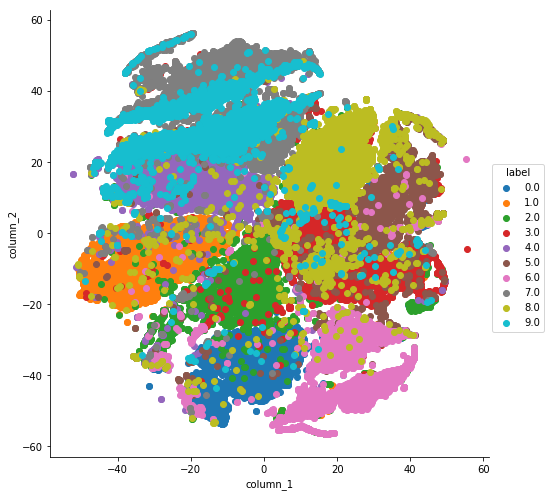

In [12]:
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

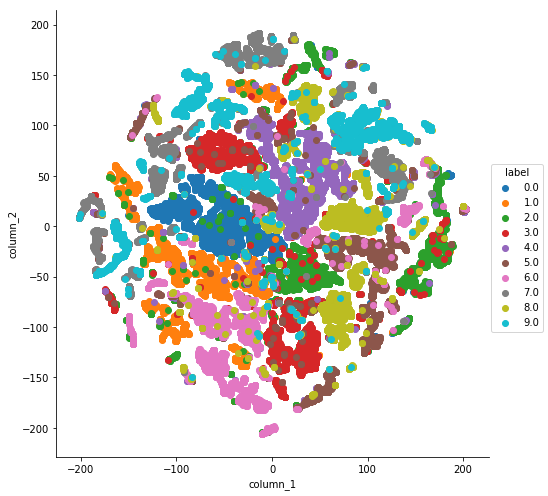

In [13]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=30, n_iter=3000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

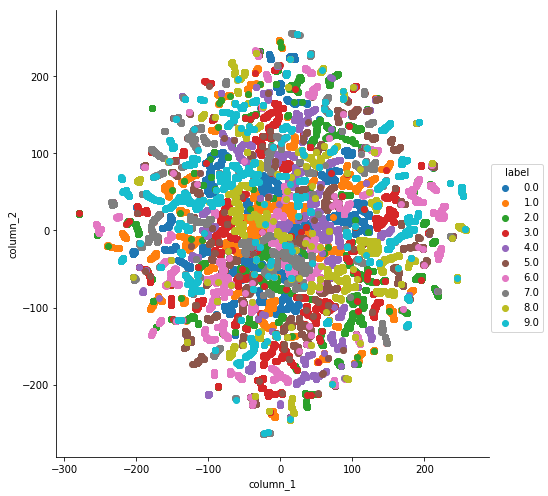

In [14]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=30, n_iter=5000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

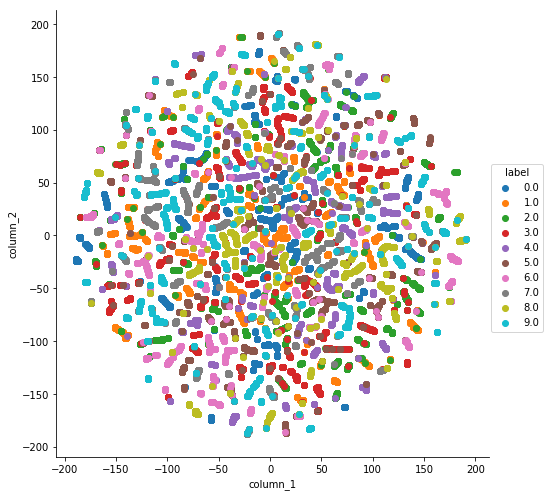

In [15]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=50, n_iter=3000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

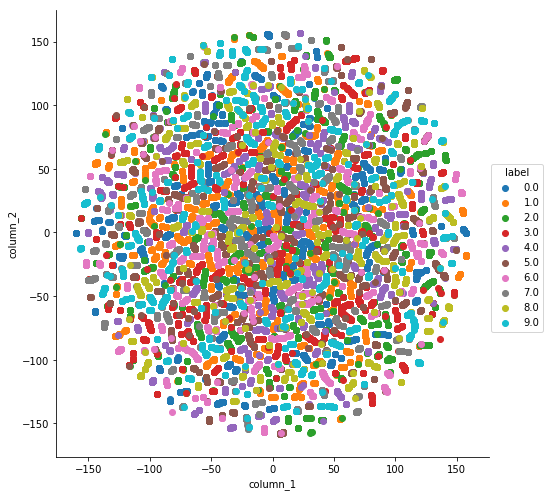

In [16]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=30, n_iter=2000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

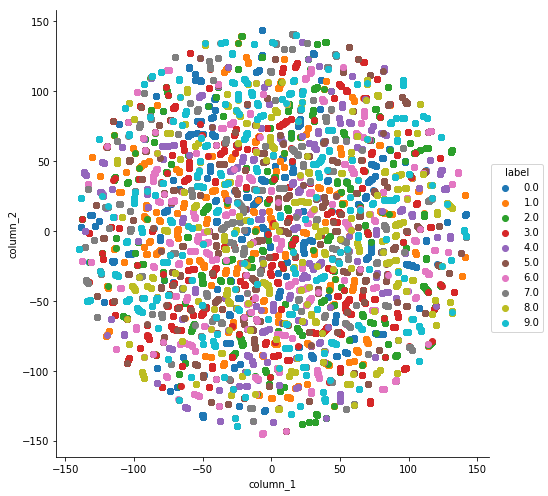

In [17]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=50, n_iter=2000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

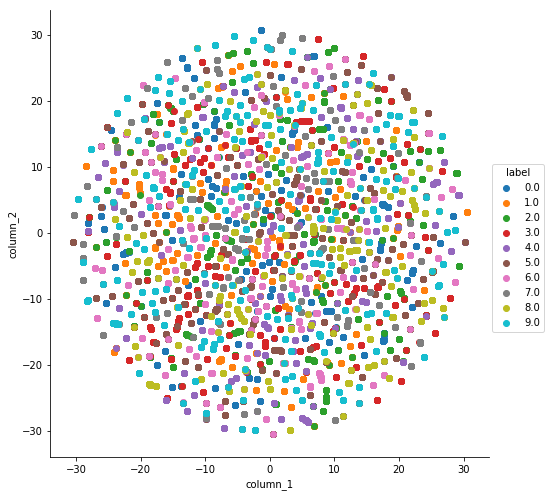

In [18]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=50, n_iter=500)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

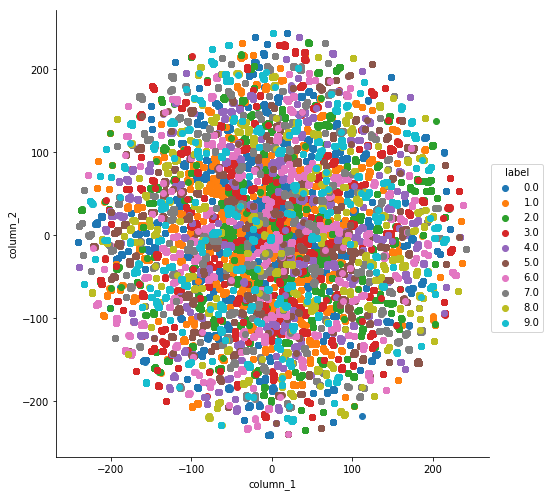

In [20]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=30, n_iter=3000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

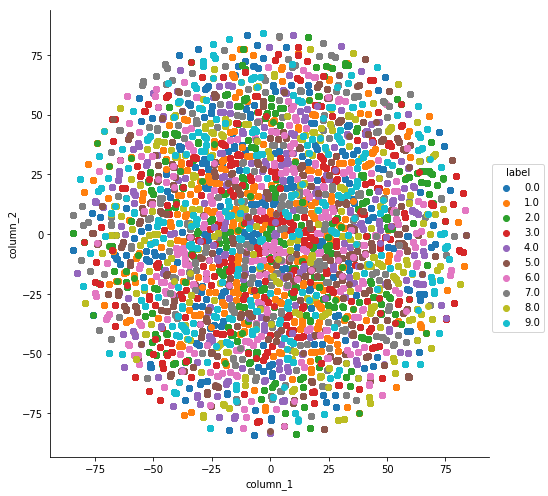

In [21]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=30, n_iter=1000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

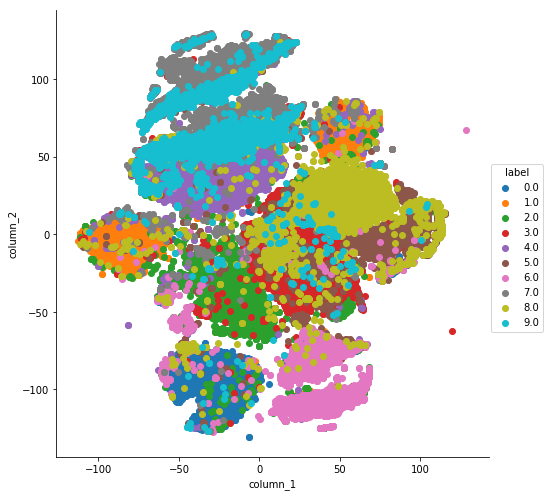

In [7]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=100, n_iter=3500)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

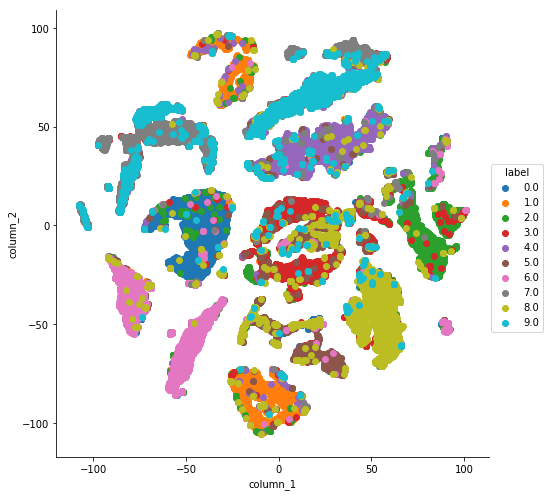

In [8]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=150, n_iter=2000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

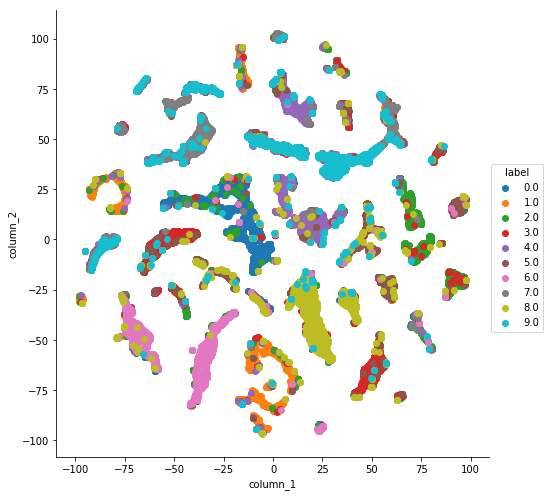

In [9]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=200, n_iter=2000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

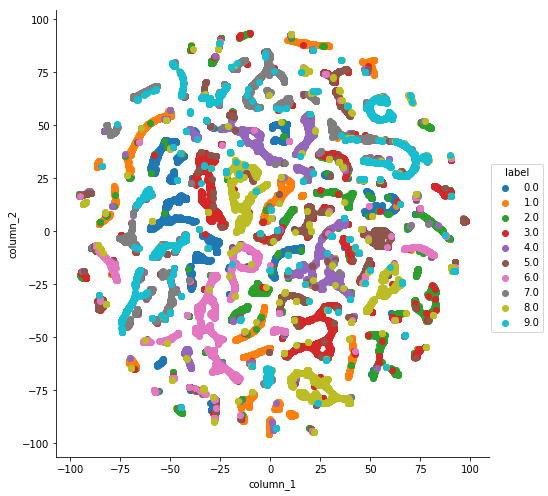

In [10]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=100, n_iter=1500)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

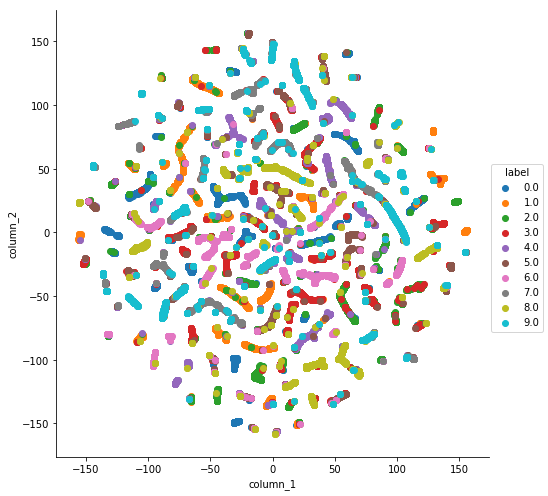

In [11]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=100, n_iter=3000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

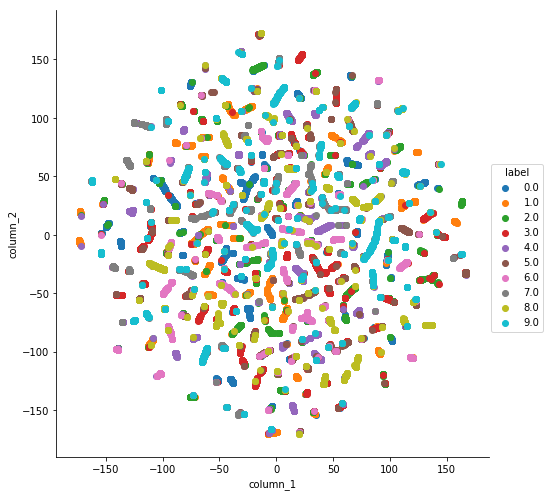

In [12]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=100, n_iter=3500)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

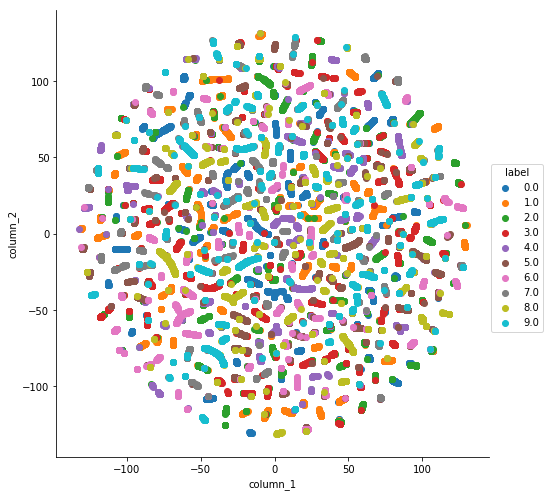

In [13]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=70, n_iter=2000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()

In [ ]:
# Repeating cycle for different configurations
model=TSNE(n_components=2,random_state=0, perplexity=70, n_iter=1000)
#We'll consider perplexity=50 and iterations=1000 for this cycle.
tsne_data=model.fit_transform(tsne_data)
tsne_data=np.vstack((tsne_data.T,tsne_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('column_1','column_2','label'))
# Plotting TSNE Results
sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,'column_1','column_2').add_legend()
plt.show()